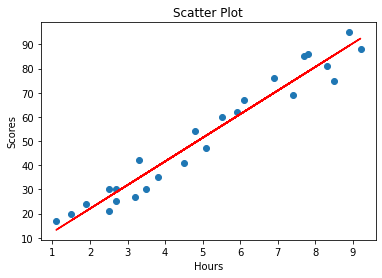

C:\Users\aayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


,Hours,Scores
0,2.50,21
1,5.10,47
2,3.20,27
3,8.50,75
4,3.50,30
5,1.50,20
6,9.20,88
7,5.50,60
8,8.30,81
9,2.70,25


In [60]:
###############       LIBRARY IMPORT       ###################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import cov
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
###############       DATA IMPORT          #####################
student_info=pd.read_csv(r'C:\Users\aayush\Desktop\Internship\Data_1.csv')
student_info
new_row={'Hours':9.25}
student_info_to_predict=student_info.append(new_row,ignore_index=True)
student_info_to_predict
###############       SCATTER PLOT         #####################
m,b=np.polyfit(student_info['Hours'],student_info['Scores'],1)
plt.plot(student_info['Hours'],(m*student_info['Hours'])+b,color='red')
plt.scatter(student_info['Hours'],student_info['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scatter Plot')
plt.show()
###############      COVARIANCE MATRIX     #####################
Covariance_Matrix=cov(student_info['Hours'],student_info['Scores'])
Hours_Variance=Covariance_Matrix[0][0]
Scores_Variance=Covariance_Matrix[1][1]
###############   CORRELATION COEFFICIENT  #####################
Correlation_Coef=pearsonr(student_info['Hours'],student_info['Scores'])
Correlation_Coef=Correlation_Coef[0]
###############   LINEAR REGRESSION        #####################
lr=LinearRegression()
x_feat=pd.DataFrame(student_info['Hours'])
y_targ=pd.DataFrame(student_info['Scores'])
fitted=lr.fit(x_feat,y_targ)
fitted.intercept_
fitted.coef_
##############  PREDICTED VALUE AT 9.25 HR/DAY  ################
student_info_to_predict.fillna(np.asscalar(lr.predict(pd.DataFrame(student_info_to_predict['Hours'].truncate(before=25)))),inplace=True)
student_info_to_predict['Scores']=student_info_to_predict['Scores'].round(0).astype(int)

################           VALIDATION        ####################
x_train,x_test,y_train,y_test=train_test_split(x_feat,y_targ,test_size=0.4,random_state=1)
lr.fit(x_train,y_train)
lr.predict(x_test)
from sklearn.metrics import r2_score
R_Squared=r2_score(lr.predict(x_test),y_test)*100
student_info_to_predict

In [54]:
Covariance_Matrix

array([[  6.3761    ,  62.3315    ],
       [ 62.3315    , 639.42666667]])

In [52]:
Hours_Variance

6.376099999999999

In [51]:
Scores_Variance

639.4266666666665

In [55]:
Correlation_Coef

0.9761906560220884

In [61]:
R_Squared

92.58187868837227